# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [61]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv', delimiter = ',')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [62]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [63]:
apple.Date = pd.to_datetime(apple.Date)
apple.Date.head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [64]:
apple.set_index('Date', inplace=True)



In [65]:
apple.head() #Aquí está bien

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [66]:
apple.nunique()

Open         3744
High         3666
Low          3652
Close        3834
Volume       7915
Adj Close    2325
dtype: int64

In [67]:
apple.index.is_unique

True

In [36]:
# NO! All are unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [69]:
apple = apple.sort_index()
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18'], dtype='object', name='Date')

In [49]:

pd.date_range(apple.index, periods=12, freq='BM')

TypeError: Cannot convert input [Index(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02', '2014-07-01',
       '2014-06-30', '2014-06-27', '2014-06-26', '2014-06-25', '2014-06-24',
       ...
       '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22', '1980-12-19',
       '1980-12-18', '1980-12-17', '1980-12-16', '1980-12-15', '1980-12-12'],
      dtype='object', name='Date', length=8465)] of type <class 'pandas.core.indexes.base.Index'> to Timestamp

In [37]:
#Para crear el dataframe de esto, tengo que crear un rango de fechas aparte y después vincularlo a Apple

BM = pd.date_range('2021-01-01', periods=12, freq='BM')
BM
df= pd.DataFrame(BM, columns = ['Date'])
df

,Date
0,2021-01-29
1,2021-02-26
2,2021-03-31
3,2021-04-30
4,2021-05-31
5,2021-06-30
6,2021-07-30
7,2021-08-31
8,2021-09-30
9,2021-10-29


dtype('O')

In [71]:
#Sabía qué debía introducir, pero al final esta es la forma correcta de hacerlo

apple_business = apple.resample('BM').mean()
apple_business.head()



,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,25862523,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7249866,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4231831,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7962690,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6392000,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [72]:
#Para obtener el primer y último día, debería sacar el valor más alto y más bajo del índice

oldest_date = apple.index.max()
first_date = apple.index.min()

date_difference = oldest_date - first_date
date_difference

Timedelta('12261 days 00:00:00')

12261

### Step 11.  How many months in the data we have?

In [73]:
len(apple_business.index)

404

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

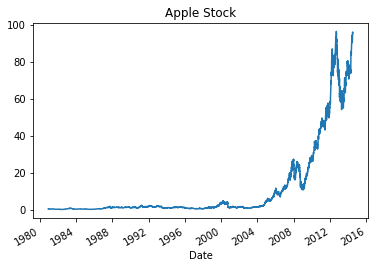

<Figure size 972x648 with 0 Axes>

In [82]:
plt.title('Apple Stock')

grafico_apple = apple['Adj Close'].plot()
plt.figure(figsize=(13.5, 9))
grafico_apple
plt.show()

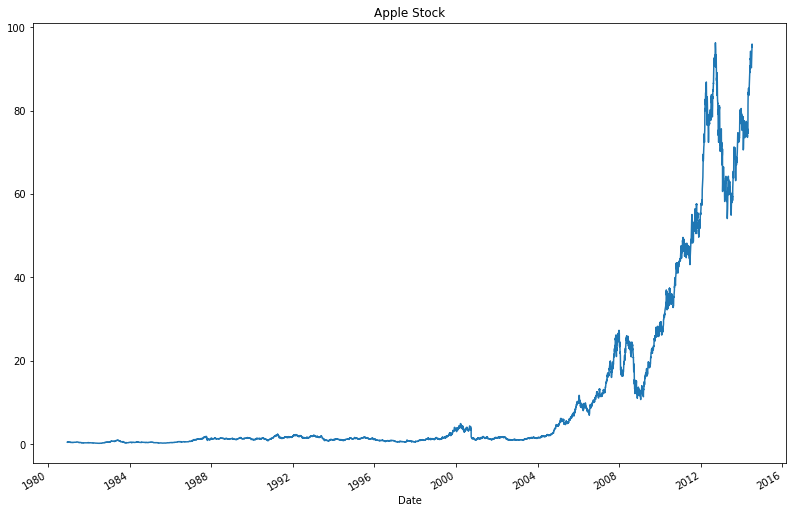

In [88]:
#Si pongo el título por separado se me crea otra gráfica, no sé por qué

# plt.title('Apple Stock')

plt.figure(figsize=(13.5, 9))

#He visto que title es un atributo de plot, así que al final, si lo pongo ahí, sí que funciona

grafico_apple = apple['Adj Close'].plot(title='Apple Stock')


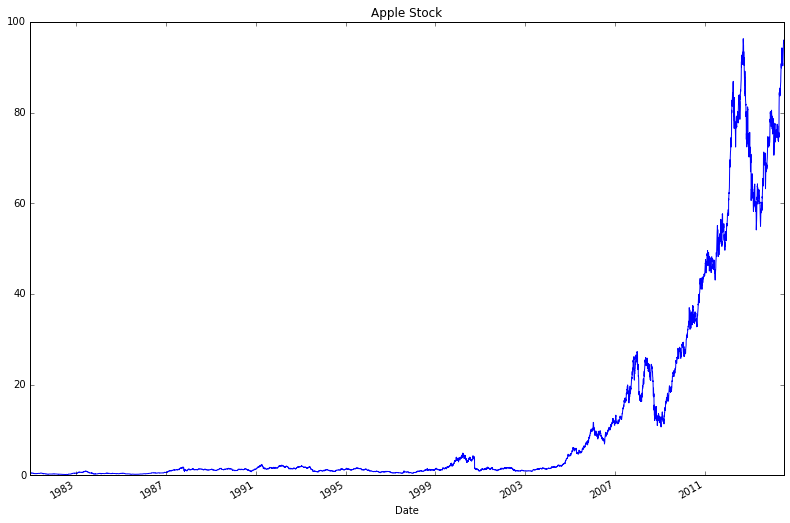

### BONUS: Create your own question and answer it.

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


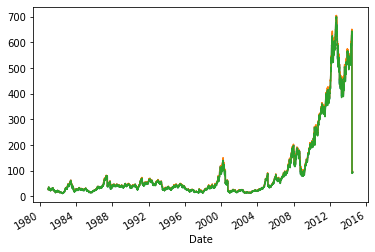

In [94]:
#No conozco bien los datos y no sé qué significa High, Low y Close en este caso


print(apple['Close'].plot())
print(apple.High.plot())
print(apple.Low.plot())
